#Tugas Besar Machine Learning Supervised

Kelompok 07

*   Nama : Andrea Rahmadanisya
*   NIM : 1301184146



# Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import seaborn as sns
sns.set_palette('Pastel1')
from sklearn.preprocessing import LabelEncoder
#lib for model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as recall

In [ ]:
!pip install pip install six
# !pip install --upgrade sklearn

Requirement already up-to-date: sklearn in /usr/local/lib/python3.7/dist-packages (0.0)


### Data Train

In [ ]:
DataTrain = pd.read_csv('kendaraan_train.csv')
DataTrain

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [ ]:
DataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
DataTrain["Tertarik"].value_counts()

0    250825
1     35006
Name: Tertarik, dtype: int64

### Data Test

In [ ]:
DataTest = pd.read_csv('kendaraan_test.csv')
DataTest

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


In [ ]:
DataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


# Preprocessing
Tahap ini diperlukan untuk menentukan tindakan yang perlu dilakukan seperti apakah data sudah bersih dari nilai null, outliers sebelum memulai melakukan klasifikasi

## Func preprocessing



fungsi **heatmap** untuk mengecek korelasi(hubungan) antar atribut yang dimiliki oleh data

In [ ]:
#check correlation
sns.set(rc={'figure.figsize':(11,8)})
def heatmap(data):
  sns.heatmap(data.corr(), vmax=1, annot=True, cmap='Pastel1')

fungsi **Check_outlier** digunakan untuk mengecek nilai pencilan yang dimiliki oleh masih masing atribut. nilai tersebut bernilai jauh sekali dari pusat data. Nilai pencilan ini dapat menyebabkan distorsi terhadap nilai yang asli

In [ ]:
#outlier
def Check_outlier(data):
  plt.figure(figsize=(150, 200))
  f, axes = plt.subplots(1, 8)
  sns.boxplot(y= data['Jenis_Kelamin'], ax= axes[0], color='rosybrown')
  sns.boxplot(y= data['Umur'], ax= axes[1], color='rosybrown')
  sns.boxplot(y= data['Kode_Daerah'], ax=axes[2], color='rosybrown')
  sns.boxplot(y= data['Sudah_Asuransi'], ax=axes[3], color='rosybrown')
  sns.boxplot(y= data['Umur_Kendaraan'], ax=axes[4], color='rosybrown')
  sns.boxplot(y= data['Premi'], ax=axes[5], color='rosybrown')
  sns.boxplot(y= data['Kanal_Penjualan'], ax=axes[6], color='rosybrown')
  sns.boxplot(y= data['Lama_Berlangganan'], ax=axes[7], color='rosybrown')
  plt.subplots_adjust(wspace=5)


fungsi **cleanoutlierUmur cleanoutlierPremi checkoutierLB** bertujuan untuk menhilangkan nilai outliers yang dmiliki oleh atribut, menghilangkan nilai dengan cara Mengganti nilai outliers menggunakan nilai lower bound dan upper bound.

In [ ]:
#handle outlier 
def Check_outlierUmur(data):
  while True:
    qlo1, qlo3 = np.percentile(data['Umur'],[25,75])
    iqrlo = qlo3 - qlo1
    lowerlo = qlo1 - (1.5 * iqrlo)
    upperlo = qlo3 + (1.5 * iqrlo)
    outlierlo = data[(data['Umur'] < (lowerlo)) | (data['Umur'] > (upperlo))]
    print('amount of outlier data',outlierlo.shape[0]) #amount of outlier data
    idxlo = outlierlo.index
    data.drop(idxlo, inplace=True) #drop outlier data
    if (outlierlo.shape[0] <= 0):
      break
#handle outlier 
def Check_outlierPremi(data):
  while True:
    qlo1, qlo3 = np.percentile(data['Premi'],[25,75])
    iqrlo = qlo3 - qlo1
    lowerlo = qlo1 - (1.5 * iqrlo)
    upperlo = qlo3 + (1.5 * iqrlo)
    outlierlo = data[(data['Premi'] < (lowerlo)) | (data['Premi'] > (upperlo))]
    print('amount of outlier data',outlierlo.shape[0]) #amount of outlier data
    idxlo = outlierlo.index
    data.drop(idxlo, inplace=True) #drop outlier data
    if (outlierlo.shape[0] <= 0):
      break

#handle outlier 
def Check_outlierLB(data):
  while True:
    qlo1, qlo3 = np.percentile(data['Lama_Berlangganan'],[25,75])
    iqrlo = qlo3 - qlo1
    lowerlo = qlo1 - (1.5 * iqrlo)
    upperlo = qlo3 + (1.5 * iqrlo)
    outlierlo = data[(data['Lama_Berlangganan'] < (lowerlo)) | (data['Lama_Berlangganan'] > (upperlo))]
    print('amount of outlier data',outlierlo.shape[0]) #amount of outlier data
    idxlo = outlierlo.index
    data.drop(idxlo, inplace=True) #drop outlier data
    if (outlierlo.shape[0] <= 0):
      break


In [ ]:
#check empty
def empty_check(Data) :
  new_data = Data.dropna(how ='any',axis = 0)
  print("Panjang dataframe  sebelumnya:", len(Data)) 
  print("Panjang dataframe  setelah dilakukan pengecekan empty value :", len(new_data))  
  print("Jumlah baris Data dengan setidaknya 1 empty value : ", (len(Data)-len(new_data)))

In [ ]:
print('==========Data Train==============')
print(empty_check(DataTrain))
print('==========Data Test==============')
print(empty_check(DataTest))

==========Data Train==============
Panjang dataframe  sebelumnya: 285831
Panjang dataframe  setelah dilakukan pengecekan empty value : 171068
Jumlah baris Data dengan setidaknya 1 empty value :  114763
None
==========Data Test==============
Panjang dataframe  sebelumnya: 47639
Panjang dataframe  setelah dilakukan pengecekan empty value : 47639
Jumlah baris Data dengan setidaknya 1 empty value :  0
None


### Data Train

In [ ]:
#fill NAN/missing value numerik using mean
DataTrain['Umur'].fillna(DataTrain['Umur'].mean(), inplace=True)
DataTrain['SIM'].fillna(DataTrain['SIM'].mean(), inplace=True)
DataTrain['Kode_Daerah'].fillna(DataTrain['Kode_Daerah'].mean(), inplace=True)
DataTrain['Sudah_Asuransi'].fillna(DataTrain['Sudah_Asuransi'].mean(), inplace=True)
DataTrain['Premi'].fillna(DataTrain['Premi'].mean(), inplace=True)
DataTrain['Kanal_Penjualan'].fillna(DataTrain['Kanal_Penjualan'].mean(), inplace=True)
DataTrain['Lama_Berlangganan'].fillna(DataTrain['Lama_Berlangganan'].mean(), inplace=True)
DataTrain['Tertarik'].fillna(DataTrain['Tertarik'].mean(), inplace=True)

#fill missing value categorical using modus
DataTrain['Jenis_Kelamin'].fillna('Pria', inplace=True)
DataTrain['Umur_Kendaraan'].fillna('1-2 Tahun', inplace=True)
DataTrain['Kendaraan_Rusak'].fillna('Pernah', inplace=True)

# len(DataTrain)
DataTrain.isna().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
DataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      285831 non-null  object 
 2   Umur               285831 non-null  float64
 3   SIM                285831 non-null  float64
 4   Kode_Daerah        285831 non-null  float64
 5   Sudah_Asuransi     285831 non-null  float64
 6   Umur_Kendaraan     285831 non-null  object 
 7   Kendaraan_Rusak    285831 non-null  object 
 8   Premi              285831 non-null  float64
 9   Kanal_Penjualan    285831 non-null  float64
 10  Lama_Berlangganan  285831 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


mengubah category menjadi numerik

In [ ]:
DataTrain['Jenis_Kelamin']= LabelEncoder().fit_transform(DataTrain['Jenis_Kelamin']) 
DataTrain['Umur_Kendaraan']= LabelEncoder().fit_transform(DataTrain['Umur_Kendaraan']) 
DataTrain['Kendaraan_Rusak'] = (DataTrain['Kendaraan_Rusak']=='Pernah').astype(int)

DataTrain.head(3)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,1,30.0,1.0,33.0,1.0,1,0,28029.0,152.0,97.0,0
1,2,0,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0,0
2,3,0,21.0,1.0,46.0,1.0,1,0,32733.0,160.0,119.0,0


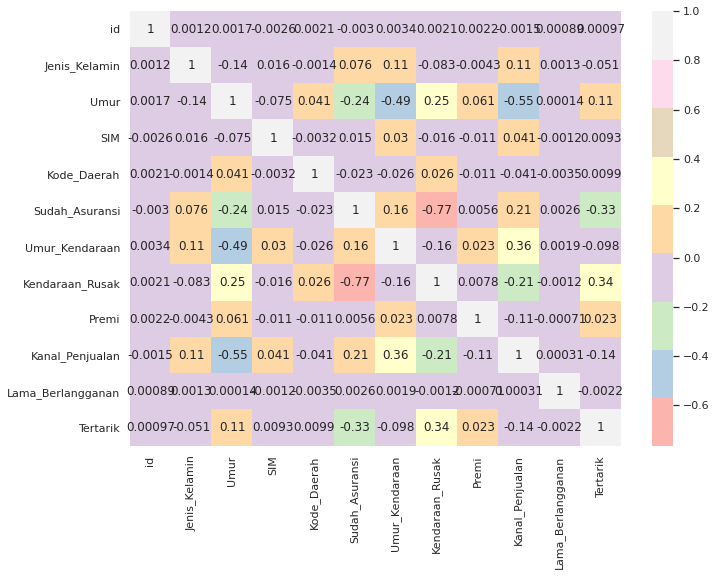

In [ ]:
heatmap(DataTrain)

<Figure size 10800x14400 with 0 Axes>

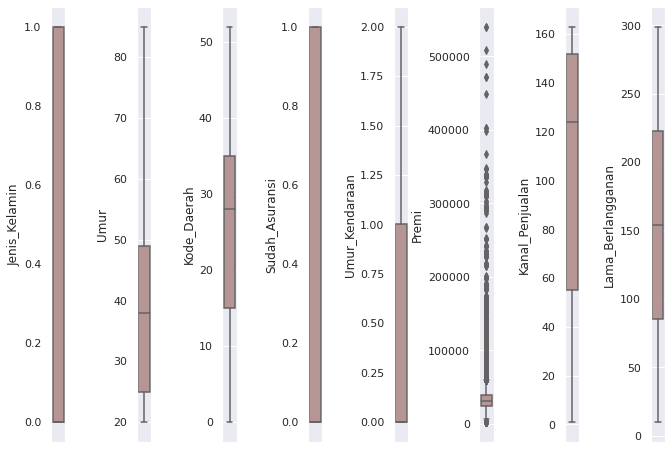

In [ ]:
Check_outlier(DataTrain)

In [ ]:
Check_outlierPremi(DataTrain)

amount of outlier data 55141
amount of outlier data 3626
amount of outlier data 1173
amount of outlier data 385
amount of outlier data 133
amount of outlier data 52
amount of outlier data 19
amount of outlier data 13
amount of outlier data 2
amount of outlier data 0


In [ ]:
Check_outlierUmur(DataTrain)
Check_outlierLB(DataTrain)

amount of outlier data 6
amount of outlier data 0
amount of outlier data 0


Text(0.5, 1.0, 'Data Train')

<Figure size 10800x14400 with 0 Axes>

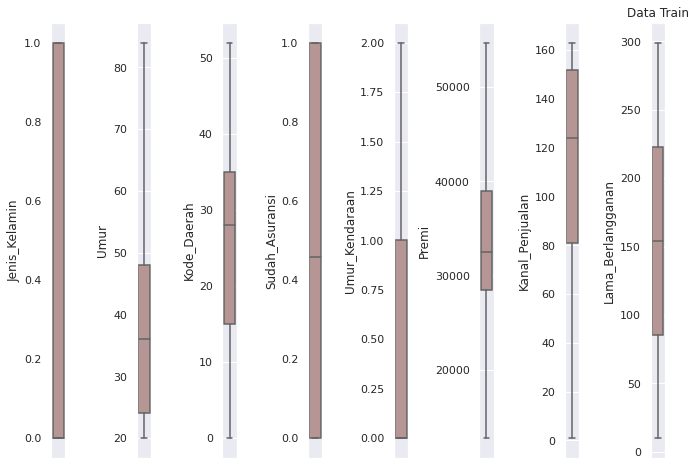

In [ ]:
Check_outlier(DataTrain)
plt.title("Data Train")

mengecek apakah class target pada data train seimbang atau tidak

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


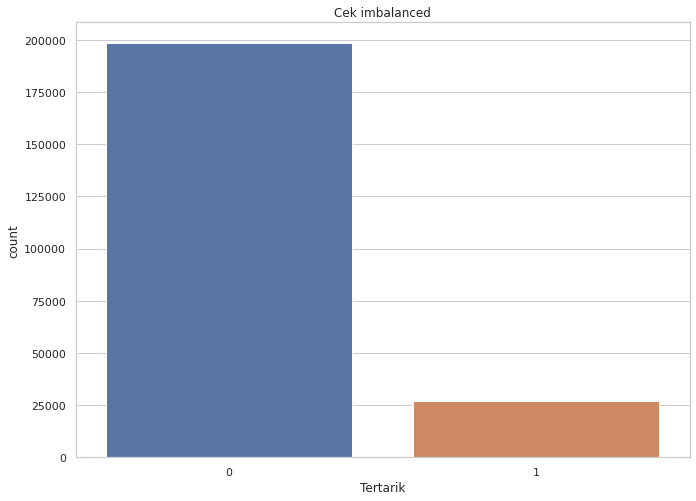

In [ ]:
sns.set(style="whitegrid")
sns.countplot(DataTrain.Tertarik)
plt.title("Cek imbalanced")
plt.show()

### Data Test

In [ ]:
DataTest.fillna(DataTest.mean(), inplace=True)
DataTest.head(3)
DataTest.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

mengubah category menjadi numerik

In [ ]:
DataTest['Jenis_Kelamin']= LabelEncoder().fit_transform(DataTest['Jenis_Kelamin']) 
DataTest['Umur_Kendaraan']= LabelEncoder().fit_transform(DataTest['Umur_Kendaraan']) 
DataTest['Kendaraan_Rusak'] = (DataTest['Kendaraan_Rusak']=='Pernah').astype(int)

DataTest.head(3)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,49,1,8,0,0,1,46963,26,145,0
1,0,22,1,47,1,1,0,39624,152,241,0
2,0,24,1,28,1,1,0,110479,152,62,0


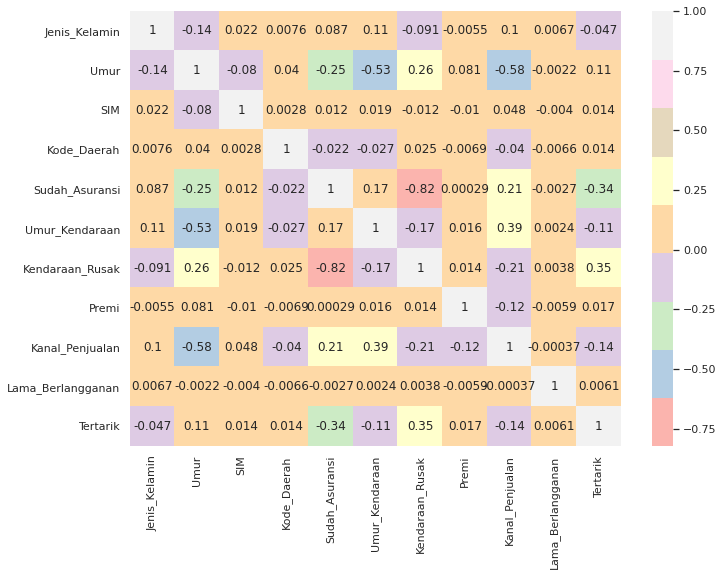

In [ ]:
#check correlation
heatmap(DataTest)

Text(0.5, 1.0, 'Data Test')

<Figure size 10800x14400 with 0 Axes>

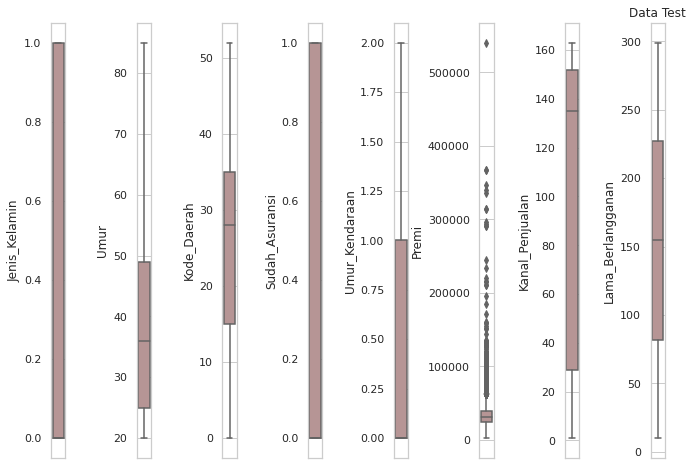

In [ ]:
#outlier
Check_outlier(DataTest)
plt.title("Data Test")

In [ ]:
Check_outlierPremi(DataTest)

amount of outlier data 1271
amount of outlier data 206
amount of outlier data 39
amount of outlier data 1
amount of outlier data 0


In [ ]:
Check_outlierUmur(DataTest)

amount of outlier data 0


Text(0.5, 1.0, 'Data Test')

<Figure size 10800x14400 with 0 Axes>

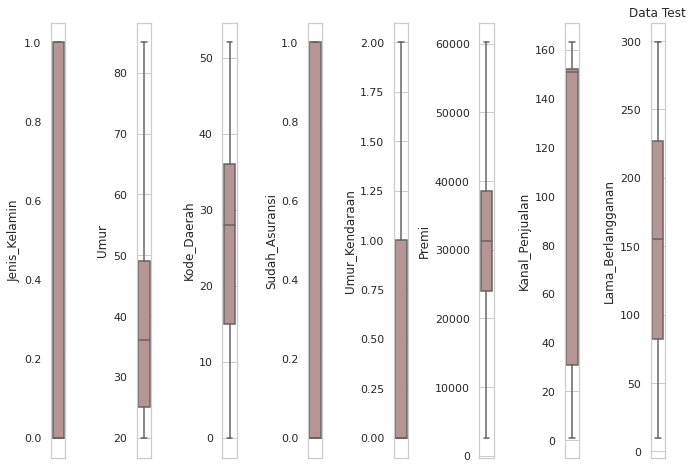

In [ ]:
Check_outlier(DataTest)
plt.title("Data Test")

In [ ]:
print(len(DataTrain))
print(len(DataTest))

225281
46122


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


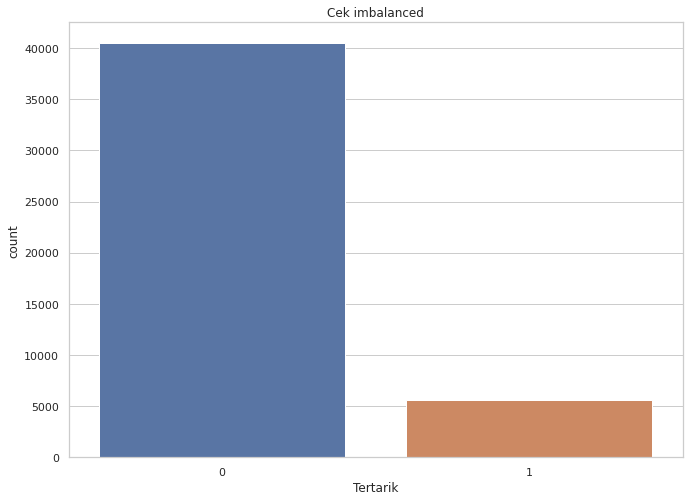

In [ ]:
sns.set(style="whitegrid")
sns.countplot(DataTest.Tertarik)
plt.title("Cek imbalanced")
plt.show()

## Atribut Pemodelan
atribut pemodelan yang akan melakukan proses klasifikasi yaitu "Jenis_Kelamin	Umur	SIM	Kode_Daerah	Sudah_Asuransi	Umur_Kendaraan	Kendaraan_Rusak	Premi	Kanal_Penjualan	Lama_Berlangganan	Tertarik" untuk data Train akan di tampung oleh variable Train begitupun juga dengan data Test yang akan di tampung oleh var Test

class target memiliki atribut "Tertarik" yang akan ditampung oleh variable targetTrain dan targetTest

In [ ]:
targetTrain = DataTrain['Tertarik']
Train = DataTrain.drop(['id'], axis=1)
Train.head(3)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,33.0,1.0,1,0,28029.0,152.0,97.0,0
1,0,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0,0
2,0,21.0,1.0,46.0,1.0,1,0,32733.0,160.0,119.0,0


In [ ]:
Train = Train.drop(['Tertarik'], axis=1)
Train.head(3)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,30.0,1.0,33.0,1.0,1,0,28029.0,152.0,97.0
1,0,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0
2,0,21.0,1.0,46.0,1.0,1,0,32733.0,160.0,119.0


In [ ]:
targetTest = DataTest['Tertarik']
Test = DataTest.drop(['Tertarik'], axis=1)
Test.head(3)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,49,1,8,0,0,1,46963,26,145
1,0,22,1,47,1,1,0,39624,152,241
3,0,46,1,8,1,0,0,36266,124,34


In [ ]:
print(len(targetTest))
print(len(targetTrain))

46122
225281


## Feature Scalling
Data akan berubah menjadi rata-rata -1 dan deviasi 1

In [ ]:
from sklearn.preprocessing import StandardScaler

def scale(data):
  scaler = StandardScaler()
  classification = scaler.fit_transform(data)
  classification = pd.DataFrame(classification, columns=["Jenis_Kelamin",	"Umur",	"SIM",	"Kode_Daerah",	"Sudah_Asuransi",	"Umur_Kendaraan",	
                                                         "Kendaraan_Rusak",	"Premi",	"Kanal_Penjualan"	,"Lama_Berlangganan"]) 
  return classification

In [ ]:
Train = scale(Train)
Train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1.121486,-0.536832,0.046695,0.508826,1.065773,0.855195,-1.019875,-0.747806,0.751396,-0.701329
1,-0.891674,0.659995,0.046695,0.978516,-0.987291,2.614430,0.980512,-1.030433,-1.604149,0.045660
2,-0.891674,-1.135246,0.046695,1.526488,1.065773,0.855195,-1.019875,-0.151359,0.904602,-0.431923
3,-0.891674,0.792976,0.046695,0.665389,-0.987291,2.614430,0.980512,0.117955,-0.474254,0.486506
4,-0.891674,-1.135246,0.046695,0.665389,1.065773,0.855195,-1.019875,-1.419061,0.751396,0.204855


In [ ]:
Test = scale(Test)
Test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1.089836,0.672491,0.044707,-1.381927,-0.923074,-0.903920,0.996019,1.217690,-1.611489,-0.111794
1,-0.917569,-1.074527,0.044707,1.549101,1.083337,0.837905,-1.003997,0.716016,0.725593,1.036152
2,-0.917569,0.478378,0.044707,-1.381927,1.083337,-0.903920,-1.003997,0.486472,0.206241,-1.439106
3,-0.917569,-0.233370,0.044707,-0.254608,-0.923074,-0.903920,0.996019,-0.149456,0.725593,0.892659
4,-0.917569,-0.815709,0.044707,0.121164,1.083337,0.837905,-1.003997,0.927718,0.725593,0.521968


## Split data
split data yang akan digunakan untuk klasifikasi

In [ ]:
Xtrain, ytrain = Train[:], targetTrain
Xtest, ytest = Test[:], targetTest

### undersampling
digunakan untuk mengatasi permasalahan data yang tidak seimbang dengan mengurangi ukuran kelas yang berlimpah.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# define undersampling strategy
print("Before undersampling: ", Counter(ytrain))
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(Xtrain, ytrain)

# summarize class distribution
print("After undersampling: ", Counter(y_train_under))

Before undersampling:  Counter({0: 198422, 1: 26859})
After undersampling:  Counter({0: 26859, 1: 26859})


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
# define undersampling strategy
print("Before undersampling: ", Counter(ytest))
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_test_under, y_test_under = undersample.fit_resample(Xtest, ytest)

# summarize class distribution
print("After undersampling: ", Counter(y_test_under))

Before undersampling:  Counter({0: 40482, 1: 5640})
After undersampling:  Counter({0: 5640, 1: 5640})


In [ ]:
print("Xtrain Value")
print(X_train_under)
print("Xtest Value")
print(X_test_under)
print("ytrain Value")
print(y_train_under)
print("ytest Value")
print(y_test_under)

Xtrain Value
[[-0.89167373 -1.20173605  0.04669516 ... -0.41953172  0.90460211
  -0.0400598 ]
 [ 1.12148645  1.05893756  0.04669516 ...  0.86516122 -1.16368155
   0.87836915]
 [ 1.12148645  0.79297596  0.04669516 ... -0.53415493  0.17687267
   0.89061487]
 ...
 [ 1.12148645  0.39403356  0.04669516 ...  2.30910941 -1.66160169
   1.68658662]
 [-0.89167373  0.19456236  0.04669516 ... -0.63800052 -1.92971253
  -0.06455123]
 [-0.89167373 -0.53683205  0.04669516 ... -1.72400476 -0.01422206
   0.14362599]]
Xtest Value
[[-0.91756902 -1.13923119  0.04470678 ... -0.62713693  0.87397908
   1.35901172]
 [ 1.08983627 -0.81570944  0.04470678 ... -0.41898897  0.72559289
  -0.51835793]
 [ 1.08983627 -1.00982249  0.04470678 ...  0.13880656  0.72559289
   1.35901172]
 ...
 [ 1.08983627  2.22539505  0.04470678 ... -1.8127942   0.92962389
  -1.39127503]
 [ 1.08983627  0.15485582  0.04470678 ... -0.60642467  0.20624125
  -0.59010455]
 [-0.91756902  1.31953414  0.04470678 ...  0.59051156 -1.61148948
   1.01

In [ ]:
print(len(y_train_under))
print(len(X_train_under))
print(len(y_test_under))
print(len(X_test_under))

53718
53718
11280
11280


# Pemodelan

Confusion metrics digunakan untuk mengetahui TN, TP, FN, FP

In [ ]:
from sklearn import metrics

def confusion_metrics(y_test,y_pred):
    #Showing Confusion Matrix to know True Positive, False Positive, True Negative and False Negative   
    cm = metrics.confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, 
                         columns = ['Predicted Negative', 'Predicted Positive'], 
                         index = ['Actual Negative', 'Actual Positive'])

    #Assign True Positive, False Positive, True Negative and False Negative intu variable
    TN = cm_df.loc['Actual Negative','Predicted Negative']
    FN = cm_df.loc['Actual Positive','Predicted Negative']
    FP = cm_df.loc['Actual Negative','Predicted Positive']
    TP = cm_df.loc['Actual Positive','Predicted Positive']
    
    print('True Negative  : ',TN)
    print('False Negative : ',FN)
    print('False Positive : ',FP)
    print('True Positive  : ',TP)
    print('')
    
    #Find Precision, Recall, and F1-Score
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_pred))

### SVM

In [ ]:
svm = SVC(gamma="scale")
svm.fit(X_train_under, y_train_under)
SVM_pred = svm.predict(X_test_under)
print("Support Vector Machine\n")

print("F1-SCORE ",f1(y_test_under,SVM_pred,average='macro') * 100)
print("ACCURACY ",acc(y_test_under,SVM_pred) * 100)
print("PRECISION ",prec(y_test_under,SVM_pred,average='macro') * 100)
print("RECALL",recall(y_test_under,SVM_pred,average='macro') * 100)

Support Vector Machine

F1-SCORE  79.16110256176454
ACCURACY  79.60106382978724
PRECISION  82.33145553424805
RECALL 79.60106382978724


In [ ]:
#confusion Metrics
confusion_metrics(y_test_under,SVM_pred)

True Negative  :  3670
False Negative :  331
False Positive :  1970
True Positive  :  5309

              precision    recall  f1-score   support

           0       0.92      0.65      0.76      5640
           1       0.73      0.94      0.82      5640

    accuracy                           0.80     11280
   macro avg       0.82      0.80      0.79     11280
weighted avg       0.82      0.80      0.79     11280



## Eksperimen

### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=3).fit(X_train_under, y_train_under)
rf_predict = rf.predict(X_test_under)

print("Random Forest\n")

print("F1-SCORE ",f1(y_test_under,rf_predict,average='macro') * 100)
print("ACCURACY ",acc(y_test_under,rf_predict) * 100)
print("PRECISION ",prec(y_test_under,rf_predict,average='macro') * 100)
print("RECALL",recall(y_test_under,rf_predict,average='macro') * 100)

Random Forest

F1-SCORE  78.60937719734473
ACCURACY  78.81205673758865
PRECISION  79.9470696571781
RECALL 78.81205673758865


In [ ]:
#confusion Metrics
confusion_metrics(y_test_under,rf_predict)

True Negative  :  3896
False Negative :  646
False Positive :  1744
True Positive  :  4994

              precision    recall  f1-score   support

           0       0.86      0.69      0.77      5640
           1       0.74      0.89      0.81      5640

    accuracy                           0.79     11280
   macro avg       0.80      0.79      0.79     11280
weighted avg       0.80      0.79      0.79     11280



### KNN

In [ ]:
#Create a KNeighbors Classifier
knn = KNeighborsClassifier()
# Train the model using the training sets
knn.fit(X_train_under, y_train_under)
#Predict Output
knn_predict = knn.predict(X_test_under)
# Accuracy score
print("K NEAREST NEIGHBOR\n")

print("F1-SCORE ",f1(y_test_under,knn_predict,average='macro') * 100)
print("ACCURACY ",acc(y_test_under,knn_predict) * 100)
print("PRECISION ",prec(y_test_under,knn_predict,average='macro') * 100)
print("RECALL",recall(y_test_under,knn_predict,average='macro') * 100)

K NEAREST NEIGHBOR

F1-SCORE  76.6766960195542
ACCURACY  76.80851063829788
PRECISION  77.42857495744036
RECALL 76.80851063829788


In [ ]:
#confusion Metrics
confusion_metrics(y_test_under,knn_predict)

True Negative  :  3908
False Negative :  884
False Positive :  1732
True Positive  :  4756

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      5640
           1       0.73      0.84      0.78      5640

    accuracy                           0.77     11280
   macro avg       0.77      0.77      0.77     11280
weighted avg       0.77      0.77      0.77     11280



# Prediksi
hasil prediksi menggunaka algoritma klasifikasi SVM karena memiliki hasil akurasi yang tinggi dibandingkan dengan algoritma lainnya

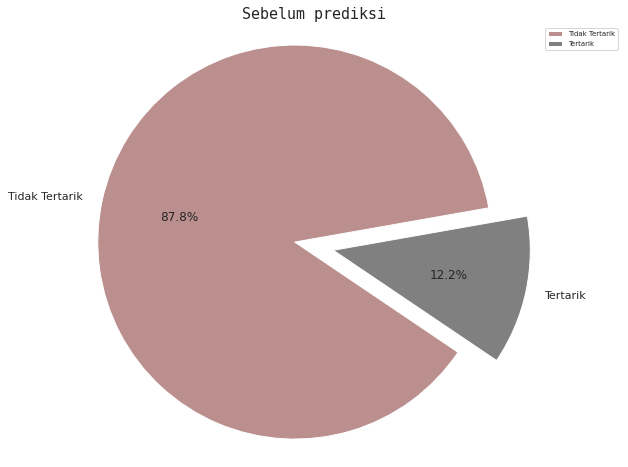

In [ ]:
tertarik = DataTest['Tertarik'].value_counts()
color=['rosybrown', 'gray']

fig1, ax1 = plt.subplots()
ax1.pie(tertarik.values, labels=['Tidak Tertarik','Tertarik'], autopct='%1.1f%%',colors=color,startangle=10, explode=(
    0, 0.20))
plt.title('Sebelum prediksi', fontdict={
          'fontname': 'Monospace', 'fontsize': 15})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

In [ ]:
TertarikAfter = pd.Series(SVM_pred, name = "Prediksi Tertarik").astype(int)
results = pd.concat([TertarikAfter],axis = 1)
results.head(3)

,Prediksi Tertarik
0,0
1,0
2,0


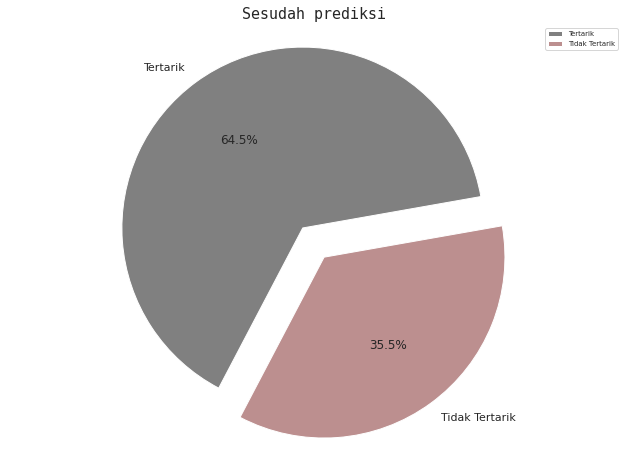

In [ ]:
tertarik = results['Prediksi Tertarik'].value_counts()
color=['gray','rosybrown']

fig1, ax1 = plt.subplots()
ax1.pie(tertarik.values, labels=['Tertarik','Tidak Tertarik'], autopct='%1.1f%%',colors=color,startangle=10, explode=(
    0, 0.20))
plt.title('Sesudah prediksi', fontdict={
          'fontname': 'Monospace', 'fontsize': 15})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

Terimakasi